# BMEN 509 Final Project

Sarim Kamran - 
Zaid Mujtaba -
Moiz Malik -
Arafatul Mamur

## Introduction

The project is motivated by the prevalent challenges faced by researchers at the University of Calgary in the domain of biomedical imaging, particularly cell imaging. Despite the significant efforts invested in studying cells, the need for efficient image-processing techniques persists. The extensive hours spent by researchers on tasks such as counting live cells, quantifying migration rates, and analyzing protein expression underscore the demand for advanced methods in cell imaging. The study on high-throughput screening utilizing lentiviral shRNA libraries serves as a valuable reference, emphasizing the importance of advanced image processing to address critical issues in cellular analysis.<sup>1</sup> <br><br>

Focusing on some of the following Key Problems in Cell Imaging:
- Segmentation:
   - **Challenge**: Develop algorithms that can automatically generate masks for individual cells in images, facilitating the initial stage of image processing.
   - **Importance**: Efficient segmentation is crucial for subsequent analysis, allowing researchers to isolate and study individual cells accurately.
- Morphometry:
   - **Challenge**: Quantifying cellular shape changes, including measurements of cell shrinkage or elongation.
   - **Importance**: Accurate morphometric analysis is essential for understanding cellular responses to various treatments and conditions.
<br>
### Problem Statement:
Researchers grapple with processing vast cellular image datasets accurately. The imperative for precise quantification of features like protein expression and migration rates highlights the demand for advanced image processing. Can High-Throughput Screening Solve Cell Imaging Challenges Like Counting and Classifying Cells?


## Materials & Methods

The code will mainly consist of python source code within a Jupyter Notebook.

Along with the base python, we will be using the following libraries:
- Numpy
- Matplotlib
- Tensorflow
- Scipy

We will apply appropriate filters to the input images and develop robust algorithms in order to recognize the cells and processes accurately. We will utilize a similar methodology for segmentation used in the labs in order to analyze individual cells. And apply machine learning to accurately analyze morphometric properties of the input cell images. After the pre-processing and training is complete, we can build a general model that can take input images of cells in order to apply accurate cellular classification.

The inputs will be microscopic cell images mainly from the following:
- https://bbbc.broadinstitute.org/BBBC001
- https://bbbc.broadinstitute.org/BBBC017/

We will be using relevant journals in the pursuit of developing a solution to the problems stated above:

- https://www.sciencedirect.com/science/article/pii/S0092867406002388?via%3Dihub
- https://www.ncbi.nlm.nih.gov/pmc/articles/PMC8557312/

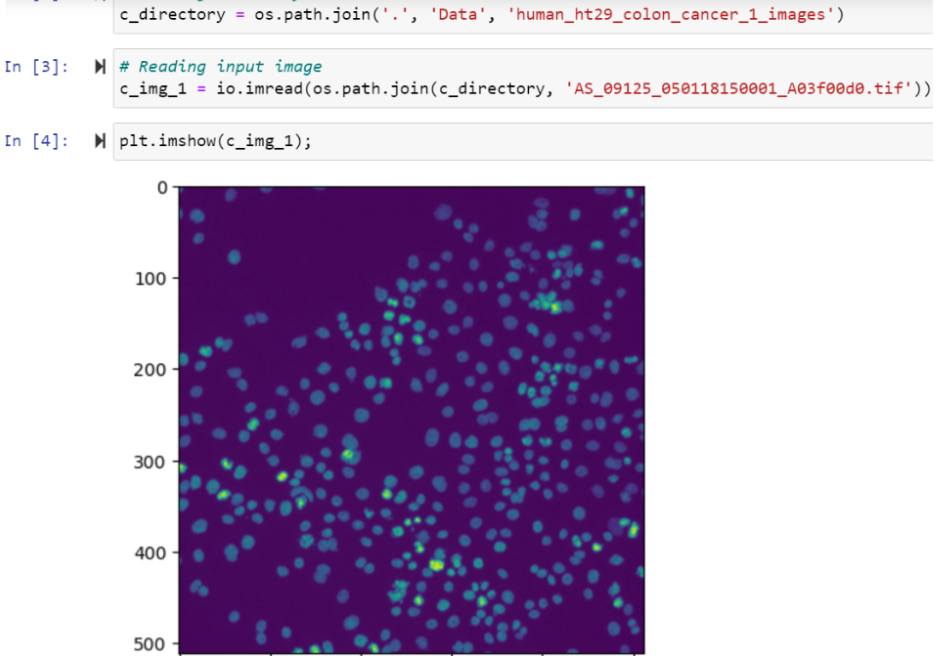

*Figure 1: Sample input cell image displayed in a Jupyter Ipython Notebook*

Over the course of the project, needs and expectations may vary. Therefore, the software tools and data sources utilized are subject to change.

## Results

In [1]:
# Library Imports
import os
import numpy as np
import matplotlib.pyplot as plt
import math
from skimage import io
from scipy import signal, ndimage
from cellpose import models, plot, core

# Setup Jupyter notebook specifics
%matplotlib inline

In [2]:
# Setting directory
c_directory = os.path.join('.', 'Data', 'human_ht29_colon_cancer_1_images')

In [3]:
# Reading input image
c_img_1 = io.imread(os.path.join(c_directory, 'AS_09125_050118150001_A03f00d0.tif'))
c_img_1 = signal.medfilt2d(c_img_1, kernel_size=5)

c_imgs = []
for i in range(6):
    c_img = io.imread(os.path.join(c_directory, f'AS_09125_050118150001_A03f0{i}d0.tif'))
    c_img = signal.medfilt2d(c_img, kernel_size=5)
    c_imgs.append(c_img)


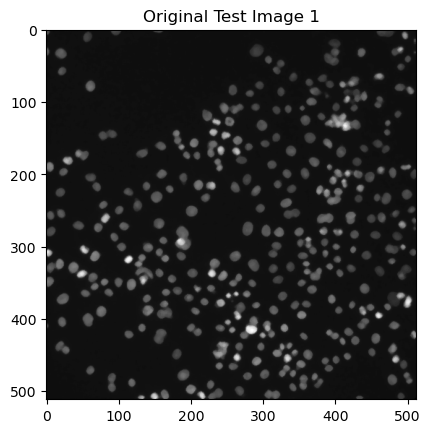

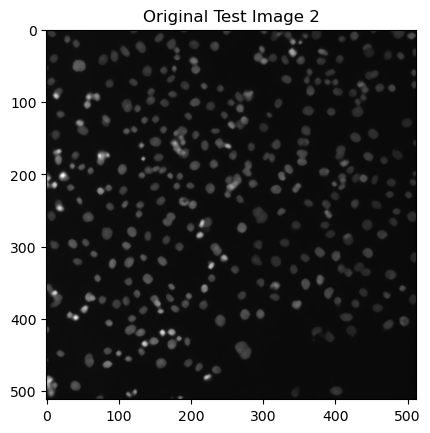

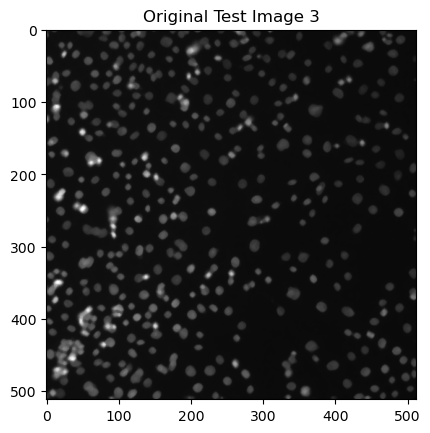

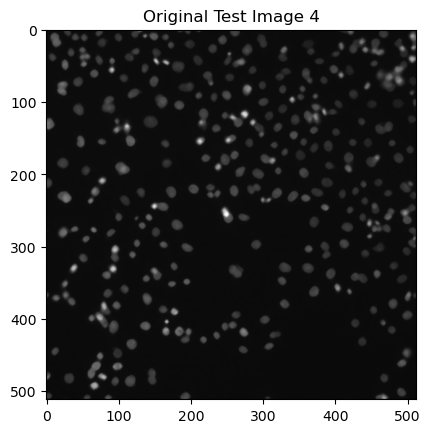

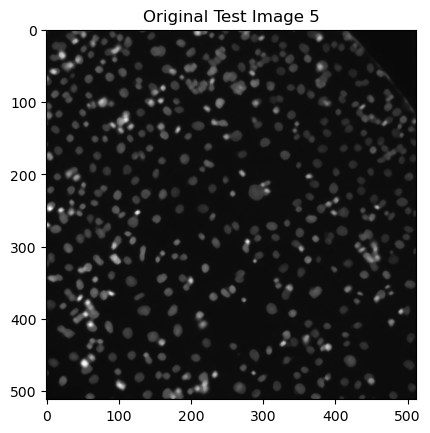

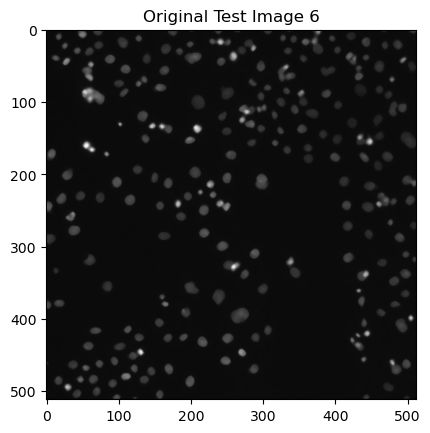

In [4]:
num = 1
for c_img in c_imgs:
    plt.imshow(c_img, cmap='gray');
    plt.title(f'Original Test Image {num}')
    num+=1
    plt.show()

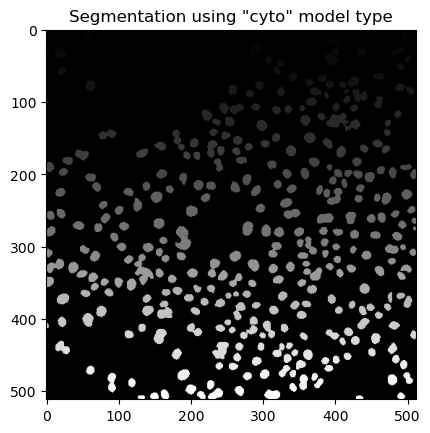

In [5]:
# Cellpose model to segment cells
use_GPU = core.use_gpu()

# Define Model
model = models.Cellpose(gpu=use_GPU, model_type='cyto') # model_type='cyto'

# Run Model
masks, flows, styles, diams = model.eval(c_img_1, diameter=5, flow_threshold=None, channels=[0,0])

plt.imshow(masks, cmap="gray")
plt.title('Segmentation using "cyto" model type')
plt.show()

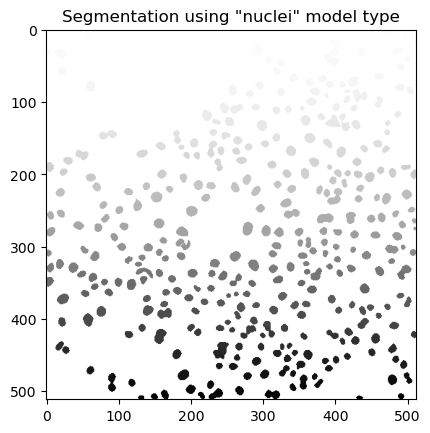

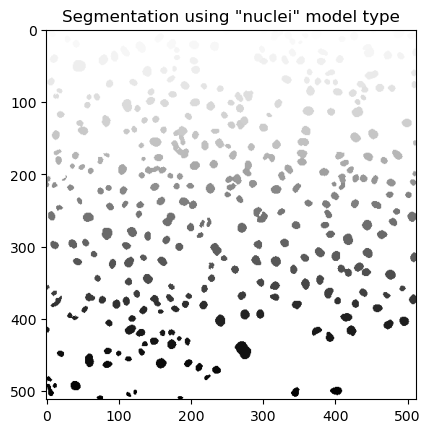

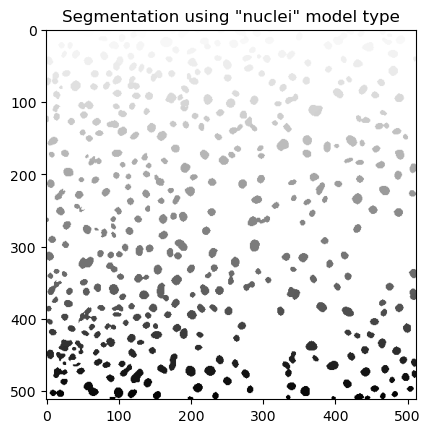

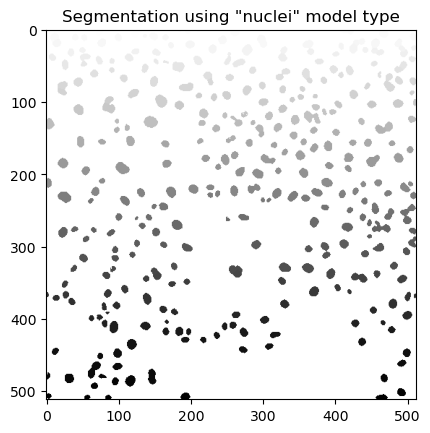

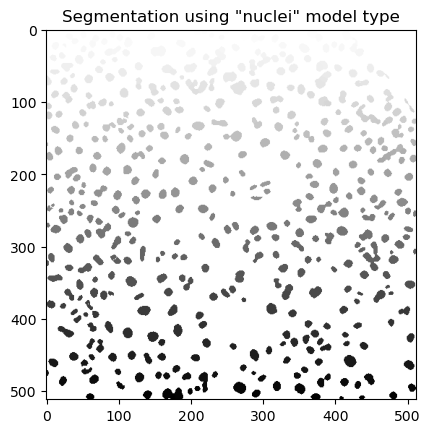

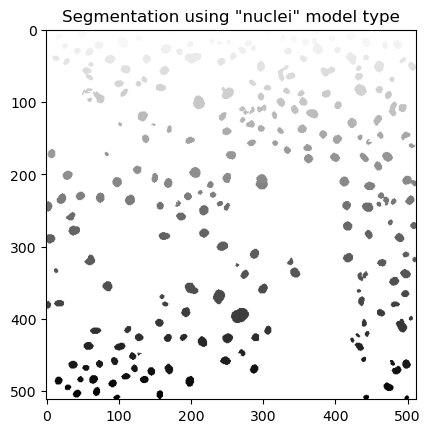

In [6]:
# Cellpose model to segment cells
use_GPU = core.use_gpu()

masks_list = []

for c_img in c_imgs:
    # Define Model
    model = models.Cellpose(gpu=use_GPU, model_type='nuclei') # model_type='nuclei'

    # Run Model
    masks, flows, styles, diams = model.eval(c_img, diameter=7, flow_threshold=None, channels=[0,0])
    masks_list.append(masks)
    plt.imshow(masks,cmap='Greys')
    plt.title('Segmentation using "nuclei" model type')
    plt.show()

### Counting the Cells

In [7]:
# Count cells
for masks in masks_list:
    num_of_cells = masks.max()
    print(num_of_cells)

380
361
463
359
531
263


### Classification Model

#### Segmenting Images

Use NDImage to segment each image into its constituent cell groups.

(93, 455)


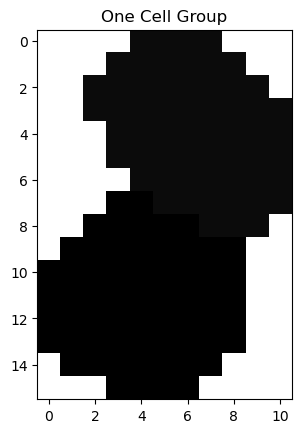

In [8]:
# NDImage to segment cell-groups
from scipy.ndimage import label

# Divide into separate images for each cell-group
cell_array = []
for masks in masks_list:
    segmented_array, num_features = label(masks != 0)
    for obj_no in range(1, segmented_array.max() + 1):
        masked_arr = np.where(segmented_array == obj_no, segmented_array, 0)

        # Find where the number occurs
        rows, cols = np.where(masked_arr == obj_no)

        # Find the bounding box of the target_number
        min_row, max_row = rows.min(), rows.max()
        min_col, max_col = cols.min(), cols.max()

        # Crop the array to this bounding box
        cropped_arr = masks[min_row:max_row + 1, min_col:max_col + 1]

        cell_array.append(((min_row, min_col), cropped_arr))

# Draw one image
chosen_obj = 39
print(cell_array[chosen_obj][0])
plt.imshow(cell_array[chosen_obj][1], cmap='Greys')
plt.title('One Cell Group')
plt.show()

After images are segmented, label the images into two categories. This labelling is done by using the Cellpose libraries decision whether the image has multiple cells or not. If the image has multiple cells according to the cellpose library, it is classified into one category.

2093
41 41
(array([[0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0],
       [0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0],
       [0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0],
       [0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1],
       [0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1],
       [0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1],
       [0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1],
       [0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0],
       [0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0],
       [0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0],
       [0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0]], dtype=uint16), True)


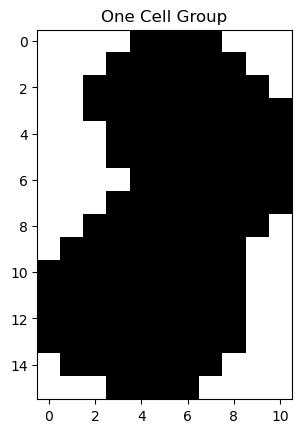

In [24]:
# Label Data for Training

def has_multiple_numbers(arr):
    # Flatten the array to make it 1D
    arr_flattened = arr.flatten()
    
    # Optional: Remove zeros if considered background
    non_zero_elements = arr_flattened[arr_flattened != 0]
    
    # Find unique numbers
    unique_numbers = np.unique(non_zero_elements)
    
    # Check if there are more than one unique numbers
    return len(unique_numbers) > 1

# Use Cellpose classification to label data as having multiple connected cells or one cell
labelled_data = []
max_x, max_y = 0, 0
for cell_group in cell_array:
    group = cell_group[1].copy()
    x, y = group.shape
    max_x = max(max_x, x)
    max_y = max(max_y, y)
    group[group != 0] = 1
    labelled_data.append(
        (group,
        has_multiple_numbers(cell_group[1]))
    )
print(len(labelled_data))
print(max_x, max_y)
print(labelled_data[chosen_obj])

plt.imshow(labelled_data[chosen_obj][0], cmap='Greys')
plt.title('One Cell Group')
plt.show()

Normalize images to 50x50

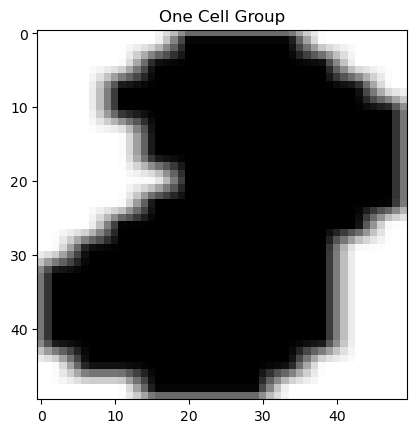

In [10]:
# Pad arrays to bring to shape (50, 50)

from skimage.transform import resize

# Assuming `images` is your list of image arrays and `labels` are your corresponding labels
resized_images = [resize(image[0], (50, 50), mode='constant', anti_aliasing=True) for image in labelled_data]

# Convert the list of images back to a NumPy array
resized_images = np.array(resized_images)

# Make sure to adjust the shape of your labels array if necessary
labels = np.array([1 if image[1] else 0 for image in labelled_data])

plt.imshow(resized_images[chosen_obj], cmap='Greys')
plt.title('One Cell Group')
plt.show()

In [11]:
dividing_count = 0
single_count = 0

for i in range(len(cell_array)):
    if has_multiple_numbers(cell_array[i][1]):
        dividing_count+=1
    else:
        single_count+=1

percentage_dividing = dividing_count / len(cell_array) * 100
print(f"{percentage_dividing} percent of the cells are undergoing mitosis")

11.944577161968466 percent of the cells are undergoing mitosis


Split the data into, training, testing, and validation. 

In [12]:
from sklearn.model_selection import train_test_split

# Split the dataset (80% train, 20% test)
x_train, x_test, y_train, y_test = train_test_split(resized_images, labels, test_size=0.2, random_state=42)
print(1 - sum(y_test) / len(y_test))

0.8782816229116945


1475
1475
1475
0
[1 1 0 ... 0 0 0]
0.46440677966101696


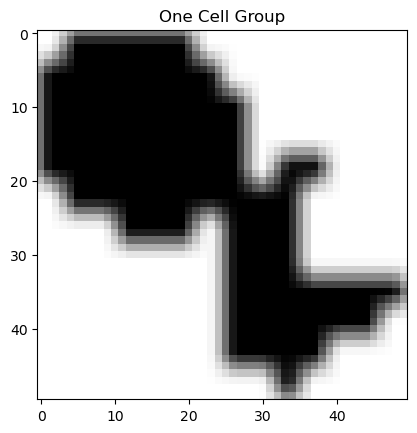

In [13]:
from sklearn.utils import resample

# Separate the majority and minority classes
x_minority = x_train[y_train == 1]
x_majority = x_train[y_train == 0]
y_minority = y_train[y_train == 1]
y_majority = y_train[y_train == 0]

# Upsample the minority class
x_minority_upsampled, y_minority_upsampled = resample(x_minority, y_minority, 
                                                       replace=True, # sample with replacement
                                                       n_samples=len(y_majority), # match number in majority class
                                                       random_state=123) # reproducible results
print(len(y_minority_upsampled))
print(len(y_majority))
print(sum(y_minority_upsampled))
print(sum(y_majority))
# Combine the upsampled minority class with the majority class
x_upsampled = np.concatenate([x_majority, x_minority_upsampled])
y_upsampled = np.concatenate([y_majority, y_minority_upsampled])

x_upsampled, x_val, y_upsampled, y_val = train_test_split(x_upsampled, y_upsampled, test_size=0.2, random_state=42)
print(y_upsampled)
print(sum(y_val) / len(y_val))

plt.imshow(x_upsampled[chosen_obj], cmap='Greys')
plt.title('One Cell Group')
plt.show()

#### Machine Learning Model

We experimented with different types of machine learning models to see which would give better results. We also experimented with different amounts of layers. <br><br>

Below is one example of what we used and the results of that experimentation. We concentrated heavily on convolutional neural networks (CNNs) because they are generally known to be good at image classification. We also experimented with deep learning models. But, they did not provide significantly better results.

In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, Activation
from tensorflow.keras.regularizers import l2

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(50, 50, 1), kernel_regularizer=l2(0.001)),
    MaxPooling2D((2, 2)),
    
    Conv2D(128, (3, 3), activation='relu', kernel_regularizer=l2(0.001)),
    MaxPooling2D((2, 2)),
    Dropout(0.5),

    Conv2D(256, (3, 3)),
    BatchNormalization(),
    Activation('relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.5),

    Conv2D(512, (3, 3)),
    BatchNormalization(),
    Activation('relu'),
    MaxPooling2D((2, 2)),

    Flatten(),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])


41 41
(array([[0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0],
       [0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0],
       [0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0],
       [0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1],
       [0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1],
       [0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1],
       [0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1],
       [0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0],
       [0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0],
       [0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0],
       [0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0]], dtype=uint16), True)


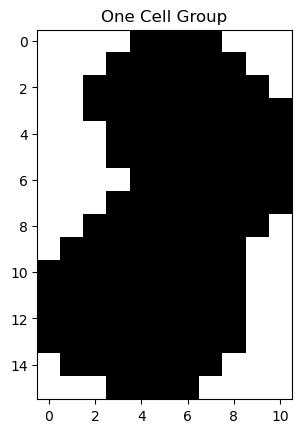

In [15]:
# Label Data for Training

def has_multiple_numbers(arr):
    # Flatten the array to make it 1D
    arr_flattened = arr.flatten()
    
    # Optional: Remove zeros if considered background
    non_zero_elements = arr_flattened[arr_flattened != 0]
    
    # Find unique numbers
    unique_numbers = np.unique(non_zero_elements)
    
    # Check if there are more than one unique numbers
    return len(unique_numbers) > 1

# Use Cellpose classification to label data as having multiple connected cells or one cell
labelled_data = []
max_x, max_y = 0, 0
for cell_group in cell_array:
    group = cell_group[1].copy()
    x, y = group.shape
    max_x = max(max_x, x)
    max_y = max(max_y, y)
    group[group != 0] = 1
    labelled_data.append(
        (group,
        has_multiple_numbers(cell_group[1]))
    )
print(max_x, max_y)
print(labelled_data[chosen_obj])

plt.imshow(labelled_data[chosen_obj][0], cmap='Greys')
plt.title('One Cell Group')
plt.show()

Add data augmentation techniques including flipping and rotation before running the model:

In [22]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import LearningRateScheduler
from tensorflow.keras.callbacks import EarlyStopping

data_generator = ImageDataGenerator(
    rotation_range=30,  # Rotates the image within 20 degrees range
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='nearest'
    # preprocessing_function=lambda x: x + np.random.normal(loc=0.0, scale=0.1, size=x.shape),  # Adds Gaussian noise
    # Add any other transformations here
)

val_datagen = ImageDataGenerator()

x_train_reshaped = x_upsampled.reshape(x_upsampled.shape[0], x_upsampled.shape[1], x_upsampled.shape[2], 1)
x_val_reshaped = x_val.reshape(x_val.shape[0], x_val.shape[1], x_val.shape[2], 1)

def step_decay(epoch):
    initial_lr = 0.0001  # Starting learning rate
    drop = 0.5  # Reduce learning rate by half
    epochs_drop = 2.0  # Every 10 epochs
    lr = initial_lr * math.pow(drop, math.floor((1+epoch)/epochs_drop))
    return lr

lr_scheduler = LearningRateScheduler(step_decay)
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)


print(x_train_reshaped.shape)
print(y_upsampled.shape)
print(x_val_reshaped.shape)
print(y_val.shape)
model.fit(data_generator.flow(x_train_reshaped, y_upsampled, batch_size=32), 
          epochs=100, 
          validation_data=val_datagen.flow(x_val_reshaped, y_val, batch_size=32), 
          callbacks=[lr_scheduler, early_stopping]
)

(2360, 50, 50, 1)
(2360,)
(590, 50, 50, 1)
(590,)
Epoch 1/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 10s 96ms/step - accuracy: 0.4539 - loss: 0.7600 - val_accuracy: 0.4644 - val_loss: 0.7330 - learning_rate: 1.0000e-04
Epoch 2/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 8s 108ms/step - accuracy: 0.5233 - loss: 0.7309 - val_accuracy: 0.4644 - val_loss: 0.7277 - learning_rate: 5.0000e-05
Epoch 3/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 9s 113ms/step - accuracy: 0.5248 - loss: 0.7257 - val_accuracy: 0.4644 - val_loss: 0.7231 - learning_rate: 5.0000e-05
Epoch 4/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 8s 110ms/step - accuracy: 0.5078 - loss: 0.7225 - val_accuracy: 0.4644 - val_loss: 0.7209 - learning_rate: 2.5000e-05
Epoch 5/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 8s 107ms/step - accuracy: 0.5216 - loss: 0.7202 - val_accuracy: 0.4644 - val_loss: 0.7188 - learning_rate: 2.5000e-05
Epoch 6/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 10s 133ms/step - accuracy: 0.5060 - loss: 0.7185 - val_accuracy: 0.4644 - val_loss: 0.7179 - learning_rate: 1.2500e-05
Epoch 7

In [23]:
x_test_reshaped = x_test.reshape(x_test.shape[0], x_test.shape[1], x_test.shape[2], 1)

test_loss, test_acc = model.evaluate(x_test_reshaped, y_test)
print(f"Test accuracy: {test_acc}")

14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.1284 - loss: 0.7175
Test accuracy: 0.1217183768749237


## Discussion 

Our results align closely with the project's motivation and objectives, which aim to enhance biomedical imaging practices, particularly in cell imaging, through the development of advanced image processing algorithms. By successfully segmenting individual cells using the Cellpose model and confirming the segmentation with the nuclei model, we have demonstrated progress toward achieving the project's objectives. Furthermore, the implementation of a cell counter and the generation of individual cell images from the segmented data represent significant milestones in streamlining the analysis of cellular processes. These results showcase the potential of advanced image processing techniques to improve efficiency and accuracy in cell imaging, addressing the key challenges outlined in the project objectives. <br><br>

The overall quality of the results is promising, considering the successful segmentation of cells and the generation of individual cell images for further analysis. The segmentation process using the Cellpose model yielded satisfactory results, as evidenced by the accurate detection of individual cells and confirmation with the nuclei model. Additionally, the implementation of a cell counter facilitated the efficient quantification of cell populations, further enhancing the utility of the developed algorithms. There is significant room for refinement and optimization in the classification model, but the achieved results demonstrate significant progress toward achieving the project's objectives. <br><br>

Ultimately, the vision is for labs to be able to take images of areas of interest with their microscopes and simply input the image into a program that will return the count and classification of cells. It is possible for this tool to be incorporated into existing microscope software. <br><br> 

In this project, we were able to count the number of cells in the image accurately, segment the image into its cell groups, and start work on a classification model. The first two were done successfully with no need for further comments. The last one, the classification model, was attempted, but until now, we were not able to create a model that could successfully classify the images. It kept overfitting or underfitting and failed to acheive any useful amount of classification. <br><br>

The limitations that led to the failure of the classification model are as follows. Firstly, the way the images were labelled could be improved with human input. Currently, we just use Cellpose to determine whether the images contained multiple cells or not. This may lead to the model having difficulty learning properly. Secondly, it is possible the model architecture is too simple to achieve this result. Thirdly, it is possible the amount of data was simply too limited to be useful in training a proper model. We only had 6 full images from which around 2000 images of individual cell groups could be extracted. More data would increase the ability to train a model without doubt.<br><br>

There are many future recommendations for this project. The first and most important is to aquire more data for training. Secondly, it is important to have a more accurate labelling method, perhaps using human input. This will help the model train much quickly. Thirdly, different or bigger architectures for the classification model should be attempted. Fourthly, it is also possible to experiment with different size normalization methods. It is possible the method of normalization used in this project increased the difficulty for the classification model.

## Conclusion

In this project, we aimed to improve cell imaging by automating cell counting along with mitosis detection, especially for the sake of cancer research. We were able to achieve some of the objectives and started work on the other objectives, the detection of mitosis. We suggest future research using more data and experimenting with different techniques as this is a very useful field.

## References

1. J. Moffat et al., “A Lentiviral RNAI library for human and mouse genes applied to an arrayed Viral High-Content screen,” Cell, vol. 124, no. 6, pp. 1283–1298, Mar. 2006, doi: 10.1016/j.cell.2006.01.040.

## Appendix